Handling Complex Images - Happy or Sad Dataset

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os 


Sample happy image:


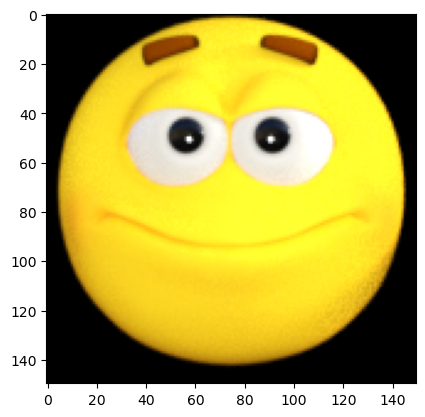

Sample sad image:


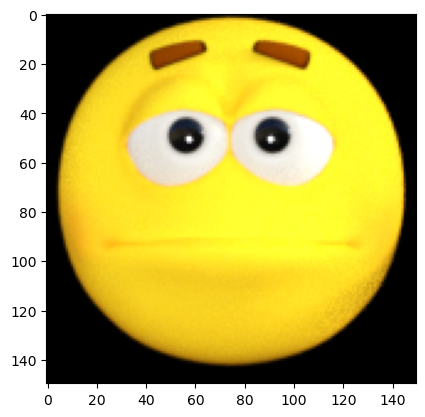

In [12]:
from tensorflow.keras.preprocessing.image import load_img
base_dir='Downloads/Files/Files/data'
happy_dir=os.path.join(base_dir,'happy')
sad_dir=os.path.join(base_dir,'sad')

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("Sample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir,os.listdir(sad_dir)[0])}"))
plt.show()

In [13]:
from tensorflow.keras.preprocessing.image import img_to_array
# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

sample_array = img_to_array(sample_image)
print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (150, 150, 3)


Defining the callback

In [23]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy')>0.999:
            print('\nReached 99.9% accuracy so terminating the training!')
            self.model.stop_training=True
callbacks=myCallback()            

Pre-processing the data

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GRADED FUNCTION: image_generator
 # Remember to set the rescale argument.
def image_generator():
    train_datagen=ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(directory='Downloads/Files/Files/data',
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
    return train_generator

In [30]:
# grader-required-cell

from tensorflow.keras import optimizers, losses
from tensorflow.keras.optimizers import RMSprop

# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model(train_generator):

    # Instantiate the callback
    callbacks = myCallback()

    ### START CODE HERE

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        
        #DNN Layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
        
    ])

    # Compile the model
    # Select a loss function compatible with the last layer of your network
    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])     


    # Train the model
    # Your model should achieve the desired accuracy in less than 15 epochs.
    # You can hardcode up to 20 epochs in the function below but the callback should trigger before 15.
    history = model.fit(x=train_generator,
                        epochs=20,
                        callbacks=[callbacks]
                       )
    
    ### END CODE HERE
    return history

In [31]:
train_generator = image_generator()

# Train the model
history = train_happy_sad_model(train_generator)

Found 80 images belonging to 2 classes.
Epoch 1/20


C:\Users\Shubham Tiwari\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.5231 - loss: 1.0286
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.7835 - loss: 0.5910
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.8178 - loss: 0.4211
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9102 - loss: 0.3195
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9134 - loss: 0.1879
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9507 - loss: 0.1203
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.8692 - loss: 0.2861
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9543 - loss: 0.1048
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9511 - loss: 0.1241
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9956 - loss: 0.0735
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9888 - loss: 0.0471
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9916 - loss: 0.0454
